## Imports

In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 

In [101]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


In [102]:
#settings

warnings.filterwarnings("ignore")
sns.set_style("white")

In [43]:
# metadata 
#print(cdc_diabetes_health_indicators.metadata) 
  
# variable information 
print(cdc_diabetes_health_indicators.variables) 

                    name     role     type      demographic  \
0                     ID       ID  Integer             None   
1        Diabetes_binary   Target   Binary             None   
2                 HighBP  Feature   Binary             None   
3               HighChol  Feature   Binary             None   
4              CholCheck  Feature   Binary             None   
5                    BMI  Feature  Integer             None   
6                 Smoker  Feature   Binary             None   
7                 Stroke  Feature   Binary             None   
8   HeartDiseaseorAttack  Feature   Binary             None   
9           PhysActivity  Feature   Binary             None   
10                Fruits  Feature   Binary             None   
11               Veggies  Feature   Binary             None   
12     HvyAlcoholConsump  Feature   Binary             None   
13         AnyHealthcare  Feature   Binary             None   
14           NoDocbcCost  Feature   Binary             

## Preprocessing

In [77]:
data = X.join(y) #join the features and output into one dataframe

#data['Sex'] = data['Sex'].replace({0: 'Female', 1: 'Male'})
pd.set_option('display.max_columns', None) 
data.head() #preview data

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11,5,4,0


In [78]:
train, test = train_test_split(data, test_size=0.2) #split 20% of the data for testing and 80% for training
print(train.info()) #Checking whether there is missing data in our training set by comparing number of entries in each column
print(test.info()) #Doing the same for our test data

<class 'pandas.core.frame.DataFrame'>
Index: 202944 entries, 92760 to 205178
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                202944 non-null  int64
 1   HighChol              202944 non-null  int64
 2   CholCheck             202944 non-null  int64
 3   BMI                   202944 non-null  int64
 4   Smoker                202944 non-null  int64
 5   Stroke                202944 non-null  int64
 6   HeartDiseaseorAttack  202944 non-null  int64
 7   PhysActivity          202944 non-null  int64
 8   Fruits                202944 non-null  int64
 9   Veggies               202944 non-null  int64
 10  HvyAlcoholConsump     202944 non-null  int64
 11  AnyHealthcare         202944 non-null  int64
 12  NoDocbcCost           202944 non-null  int64
 13  GenHlth               202944 non-null  int64
 14  MentHlth              202944 non-null  int64
 15  PhysHlth              202944 non-nu

All factors have the same number of entries. We have no missing data to deal with.

In [82]:
#check which factors have the strongest correlation with diabetes
pd.DataFrame(abs(train.corr()['Diabetes_binary']).sort_values(ascending = False))

,Diabetes_binary
Diabetes_binary,1.000000
GenHlth,0.291741
HighBP,0.263980
DiffWalk,0.218120
BMI,0.217147
HighChol,0.199494
Age,0.178369
HeartDiseaseorAttack,0.178323
PhysHlth,0.171604
Income,0.164171


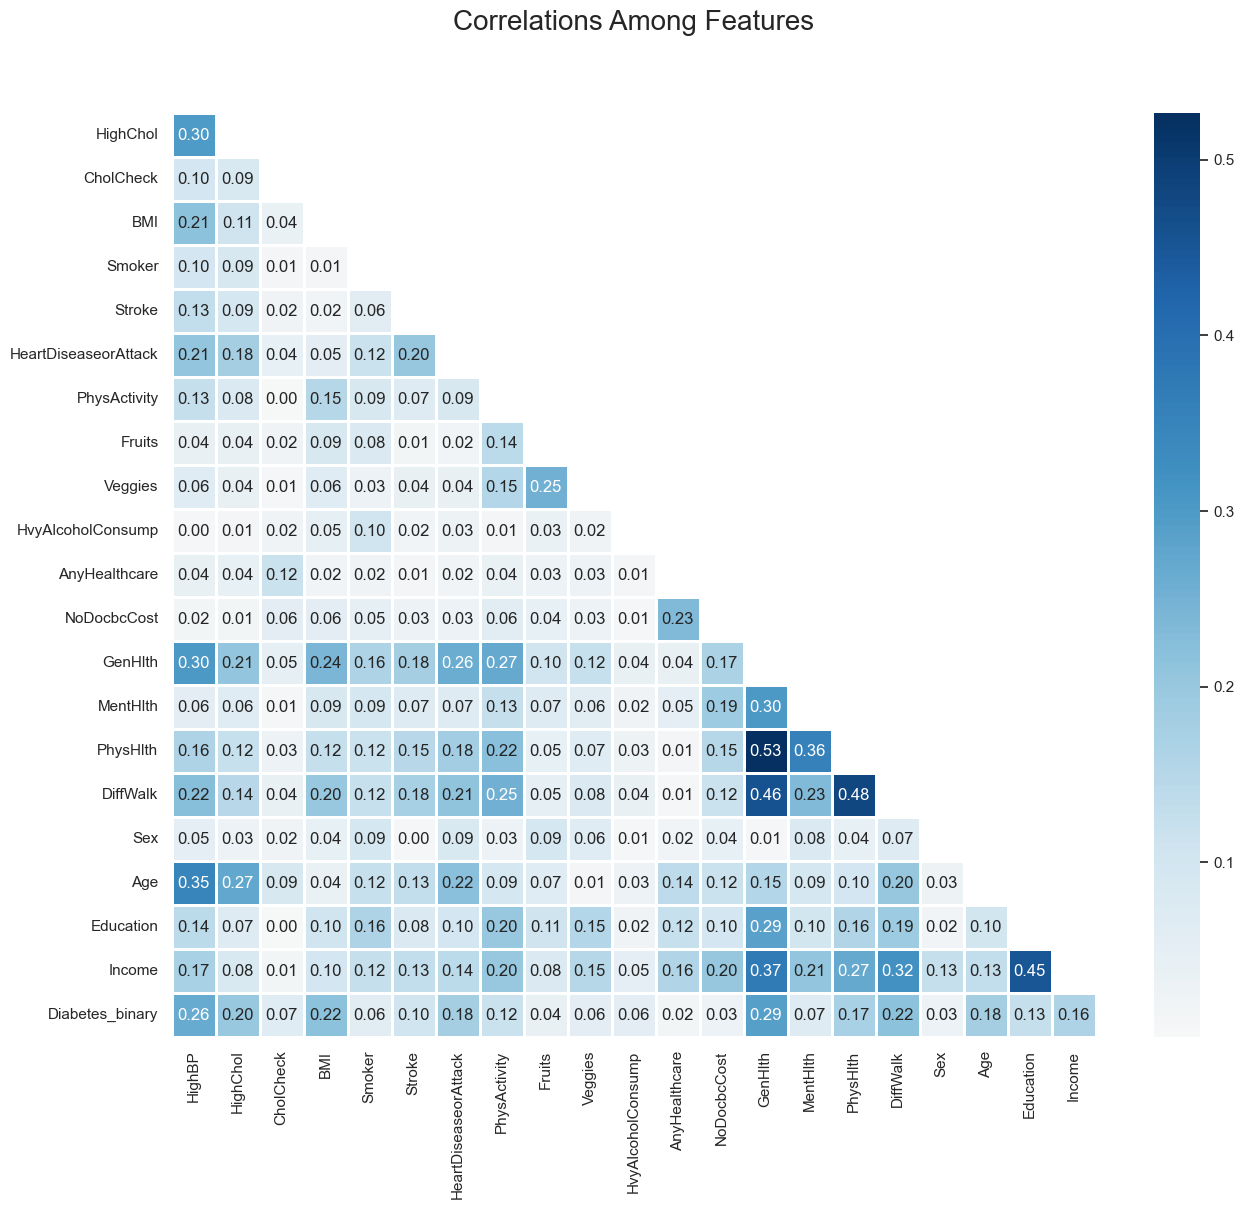

In [132]:
# create a plot of correlation between features. 
corr = abs(train.corr())

# trim and mask the data to avoid repetition
corr_trimmed = corr.iloc[1:, :-1]
mask = np.zeros_like(corr_trimmed, dtype=bool)
mask[np.triu_indices_from(mask,k=1)] = True

plt.subplots(figsize=(15,12))
plt.title("Correlations Among Features", y=1.03, fontsize=20, pad=40)
sns.heatmap(corr_trimmed, 
            annot=True,
            mask=mask,
            cmap='RdBu',
            linewidths=0.9,
            linecolor='white',
            fmt='.2f',
            center=0,
            square=True)
plt.show()

In [115]:
#create a function to check the proportion of diabetics based on a given factor

def proportion(factor,label0,label1):
    sns.set_style("white") 
    plt.subplots(figsize = (10,4))
    ax = sns.barplot(x = factor, 
                     y = "Diabetes_binary", 
                     hue=factor,
                     data=train,
                     linewidth=5,
                     capsize = .05,
                     palette="Set2",
                     legend=False
                    )
    
    plt.ylabel("Proportion diabetic", fontsize = 15, )
    plt.xlabel(factor,fontsize = 15);

    ax.set_xticklabels([label0 if label == 0 else label1 for label in ax.get_xticks()])
    return


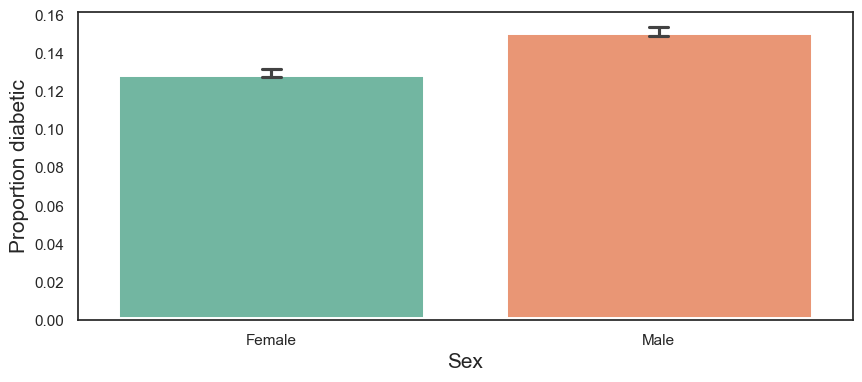

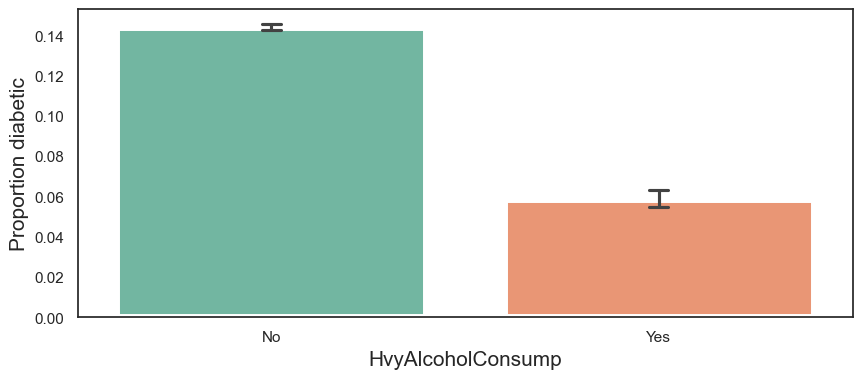

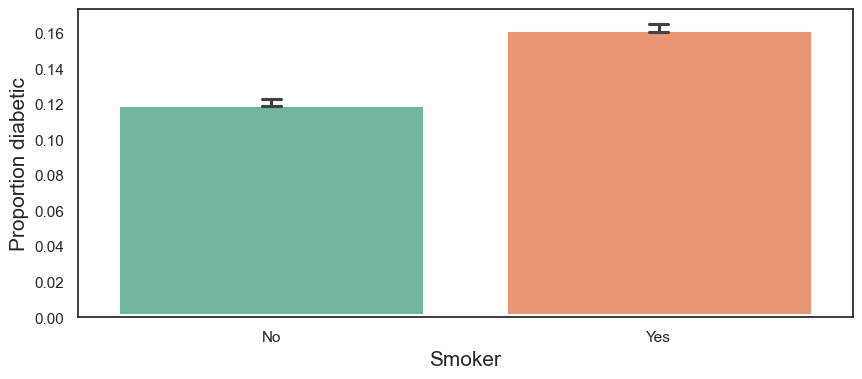

In [113]:
proportion("Sex","Female","Male")
proportion("HvyAlcoholConsump","No","Yes")
proportion("Smoker","No","Yes")